# Project: Investigate a Dataset (No_Show_Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

‘Neighborhood’ indicates the
location of the hospital.

‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

    -What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

    -What improvement should we make to avoid no showing up to appointment

    -Does Age affect Showing up to appointment?

    -Does the type of disease affect showing up to appointment?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

We going to load in the data, check for cleanliness, and then trim in order to proceed to cleaning the dataset for analysis

### General Properties

In [4]:
df_appointment = pd.read_csv("no_show_appointments.csv")
df_appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There appear to be no missing values

In [6]:
#checking the scope of the dataset
df_appointment.shape

(110527, 14)

there are 110527 raws and 14 columns in this dataset

In [7]:
#checking duplicated values
sum(df_appointment.duplicated())

0

The dataset seem to be clean as there is no duplicated values, so we would try to check unique values

In [8]:
#checking for unique values
df_appointment.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Out of 110527, there are only 62299 unique values in patitentid, non unique values from scheduladday and others but we'll go over to determine which can have unique values and not and try to clean them

In [9]:
#converting all columns to lower case for easy process
df_appointment.columns = df_appointment.columns.str.lower()
df_appointment.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [10]:
df_appointment.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


All columns in this dataset have been converted to lower case

In [11]:
#checking for duplicated values in patients id
df_appointment["patientid"].duplicated().sum()

48228

There are exactly 48228 duplicated values in patient id and we basically did check for duplicated ids to know how many times a patient schedule an appoitment and show up vs don't show up

In [12]:
df_appointment.duplicated(["patientid", "no-show"]).sum()

38710

38710 Duplicated ids in patient id appear who have schedulled appointments and didn't show up, so we'll clean later on

In [36]:
#performing statistical view of our dataset
df_appointment.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Out of 110527 ages counted, the first thing we realise is the negative value for min age (-1), this should be a mistake so we'll clean it later on. apart from that we have mean age of 37 and max of 115. 25% are around 18 years old, 50% are 37 years older meanwhile 755 are older people of 55 years old. our std is 23 Based on these details we will find answers to our question of whther age affect showing up to appointment

In [13]:
#checking the index of the negative value to clean it
index = df_appointment.index
value = df_appointment["age"] == -1
b = index[value]
result = b.tolist()
print (result)

[99832]


We've got the index of the negative value in order to clean it later



### Data Cleaning 

In [14]:
#cleaning the negative value
df_appointment.drop(index=99832, inplace=True)

In [15]:
df_appointment.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It seems we have successfully cleaned the negative value from age column

In [16]:
#removing duplicated values from patient id
df_appointment.drop_duplicates(["patientid", "no-show"], inplace=True)

In [17]:
df_appointment.shape

(71816, 14)

In [18]:
#removing unnecessary data
df_appointment.drop(["patientid", "appointmentid","scheduledday", "appointmentday"], axis=1,inplace=True)
df_appointment.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
df_appointment.shape

(71816, 10)

Unnecessary data removed, now left with valuable ones we will need

In [20]:
#renaming the column no-show & Hipertension for simple use
df_appointment.rename(columns = {'no-show':"noshow","hipertension":'hypertension'}, inplace=True)

In [21]:
df_appointment.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Overview check)

In [22]:
#Assigning the Yes or No values to specific variable to be used later
show = df_appointment.noshow == 'No'
no_show = df_appointment.noshow == 'Yes'

df_appointment[show].count()
df_appointment[no_show].count()

gender           17663
age              17663
neighbourhood    17663
scholarship      17663
hypertension     17663
diabetes         17663
alcoholism       17663
handcap          17663
sms_received     17663
noshow           17663
dtype: int64

In [23]:
#Displaying show values
df_appointment[show]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [24]:
#Displaying no show values
df_appointment[no_show]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,noshow
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...
110470,F,26,RESISTÊNCIA,0,0,0,0,0,1,Yes
110479,F,34,RESISTÊNCIA,1,0,0,0,0,1,Yes
110482,F,43,RESISTÊNCIA,1,0,0,0,0,1,Yes
110492,M,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


Now we can refer to Yes or No values as n_show and show respectively

### Research Question 2  (Correlation & influencing factors)

In [25]:
df_appointment.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'noshow'],
      dtype='object')

In [26]:
column_names = ['gender', 'age','neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'noshow']

In [27]:
list(enumerate(column_names))

[(0, 'gender'),
 (1, 'age'),
 (2, 'neighbourhood'),
 (3, 'scholarship'),
 (4, 'hypertension'),
 (5, 'diabetes'),
 (6, 'alcoholism'),
 (7, 'handcap'),
 (8, 'sms_received'),
 (9, 'noshow')]

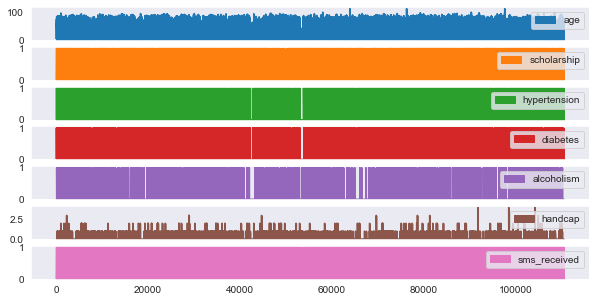

In [28]:
#Checking the overall chart
df_appointment.plot.area(figsize=(10,5),subplots=True);

There is no handcap actually and number of people having diabetes are few so does people with hypertension.
Wecan see the Age range in between 0 - 100 and slightly above 100 and a lot of people don't have scholarship
a lot of people didin't receive messages, so we will look into it to find out how many of them showed up or not
As of alcoholism, there are just few cases of it

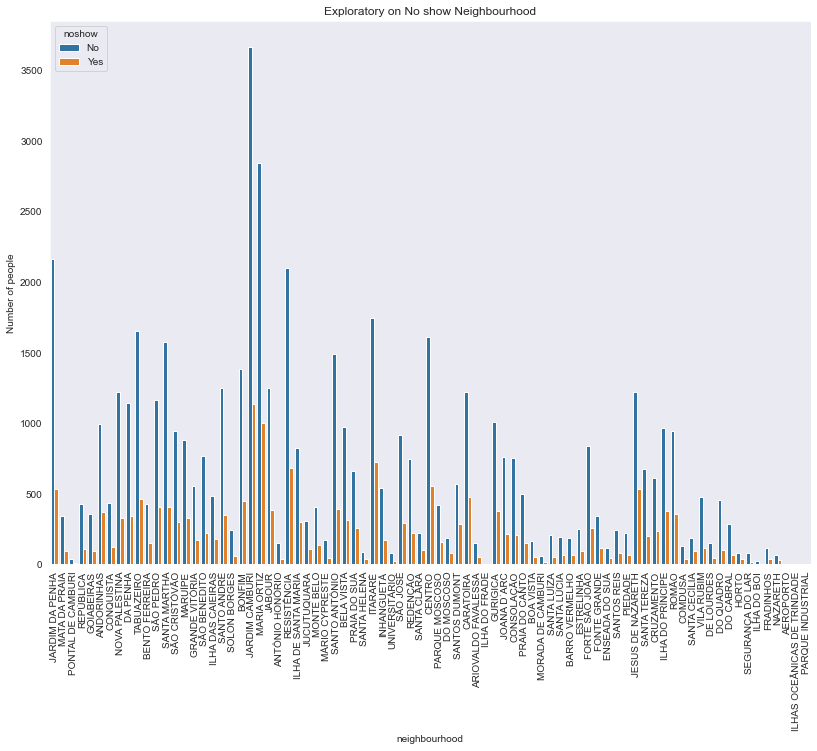

In [29]:
plt.figure(figsize = (30,10))
plt.subplot(1,2,1)
sns.countplot(x='neighbourhood', hue = 'noshow', data = df_appointment)
plt.xticks(rotation = 90);
plt.ylabel("Number of people");
plt.title("Exploratory on No show Neighbourhood");

People from JARDIN CAMBURI are the ones who show up the most, maybe they're just closer to the hospital but we can't have a say here because we don't have necessary data on distance to find it out

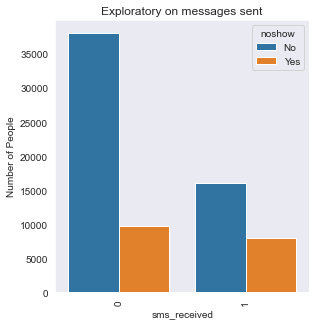

In [30]:
#Checking what factors influence showing up to appointment
def appointment(df_appointment,column_name,attended, absent):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.countplot(x='sms_received', hue = 'noshow', data = df_appointment)
    plt.xticks(rotation = 90);
    plt.title("Exploratory on messages sent")
    plt.ylabel("Number of People")
appointment(df_appointment,"sms_received",show,no_show)

Here we have a clear view on messages and Number of people who showed up or not who still received messages but the values are higher for those who don't show up,so our sms system might not be the problem but we need to review it again

hypertension  diabetes
0             0           29.0
              1           55.0
1             0           60.0
              1           64.0
Name: age, dtype: float64

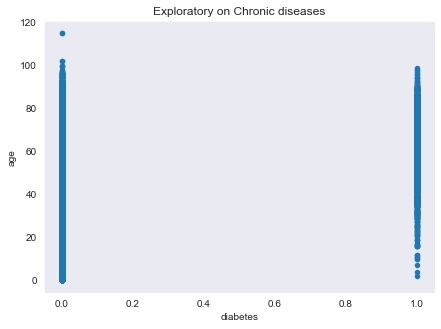

In [31]:
df_appointment[show].plot.scatter(x="diabetes",y="age",figsize=(7,5), alpha =1)
plt.title("Exploratory on Chronic diseases");
df_appointment[show].groupby(["hypertension", "diabetes"]).mean()["age"]
df_appointment[show].groupby(["hypertension", "diabetes"]).median()["age"]

hypertension  diabetes
0             0           27.0
              1           50.0
1             0           58.0
              1           63.0
Name: age, dtype: float64

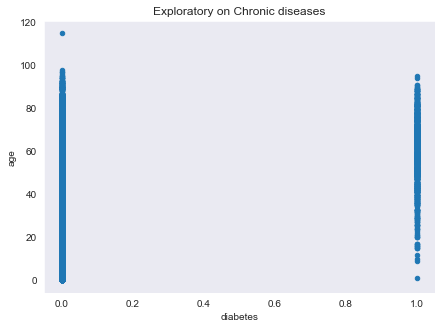

In [32]:
df_appointment[no_show].plot.scatter(x="diabetes",y="age",figsize=(7,5), alpha =1)
plt.title("Exploratory on Chronic diseases");
df_appointment[no_show].groupby(["hypertension", "diabetes"]).mean()["age"]
df_appointment[no_show].groupby(["hypertension", "diabetes"]).median()["age"]

It doesn't gives us much, so we will try another chart

hypertension  diabetes
0             0           29.0
              1           55.0
1             0           60.0
              1           64.0
Name: age, dtype: float64

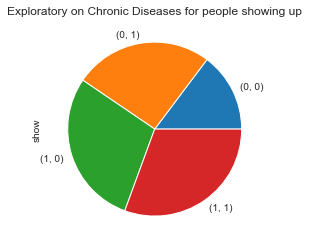

In [33]:
df_appointment[show].groupby(["hypertension", "diabetes"]).mean()["age"].plot(kind="pie", label="show");
plt.title("Exploratory on Chronic Diseases for people showing up")
df_appointment[show].groupby(["hypertension", "diabetes"]).mean()["age"]
df_appointment[show].groupby(["hypertension", "diabetes"]).median()["age"]

checking correlation with chronic disease of people who didn't show up

hypertension  diabetes
0             0           27.0
              1           50.0
1             0           58.0
              1           63.0
Name: age, dtype: float64

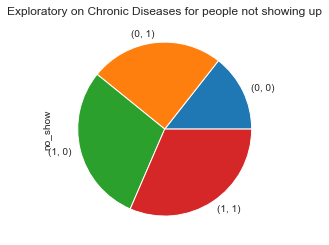

In [34]:
df_appointment[no_show].groupby(["hypertension", "diabetes"]).mean()["age"].plot(kind="pie", label="no_show");
plt.title("Exploratory on Chronic Diseases for people not showing up")
df_appointment[no_show].groupby(["hypertension", "diabetes"]).mean()["age"]
df_appointment[no_show].groupby(["hypertension", "diabetes"]).median()["age"]

There is actually no correlation between chronic diseases and showing up to appointment

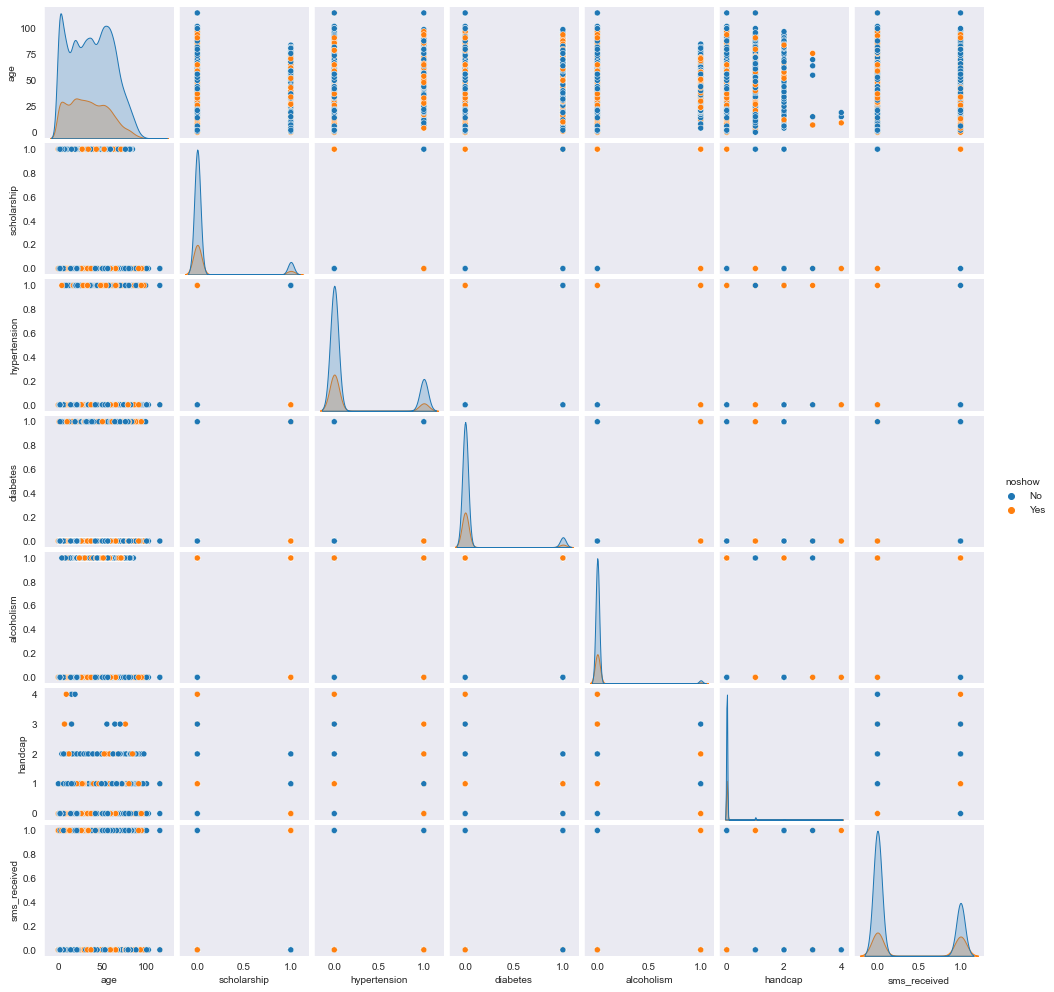

In [35]:
sns.set_style("dark");
sns.pairplot(df_appointment, hue="noshow",height=2);
plt.show()

<a id='conclusions'></a>
## Conclusions



In the first section I examined the unique values of patients IDs that might affect showing up or not and help best analyze the data
I found that Youngersters have a higher rate of showing up to appointment and the same goes for Adults of 45 to 55 years old. 
people from Jardim DA PENHA do show up the most and our Data collection system also need to be reviewed in order to avoid duplicated patient details

there should be facilities to build trust in between patients and the Hospital

<a id='Limitations'></a>
## Limitations

There is no specific correlation in between showing up and Gender, Chronic Diseases and Scholarship Program

I didn't have necessary Data to determine whether distance affect showing up to appointment